# Statistical Theory Final Project Analysis

---

Names of Group Members:

-  Jiaqi (Kelsey) Li
-  Zhuo Chen
-   Jiawei Liu




# **Analysis on the Seasonality and Fatalities Relative to Magnitudes Levels of the Tornados in the United States**

---



# Introduction

---


<br>

## Background:

---


We will analyze the data set about US Tornado 1950-2021, capturing various attributes like date, location, magnitude, number of injuries and fatalities, and details of the tornado's path. The source is: https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021/data and the raw data is from NOAA (https://www.spc.noaa.gov/wcm/#data). And in the Kaggle dataset we chose to import, the author just got rid of a few columns that are not that related or hard to understand for non-professionals. The data spans from 1950 to 2021. The latest update on Kaggle was in 2023. It is worth mentioning that we would like to think the population is all tornadoes that have occurred in the US.

<br>

We chose this data for 4 major reasons. First of all, it is absolutely large enough for us to perform any sort of analysis. Since this is a result of meteorological data collection, it is also not likely to be associated with any ethical or moral issues. In addition, it has a good combination of quatitative variable and categorical (or potential categorical) variable. And it is real data from official government organization so it should be relatively credibel and clean.

<br>

With the help of the instructor, we first upload the data to GitHub, and then insert the data via `read.csv` to access the web address of our file so that all members of the group and instructor can run the data in this file.

<br>

After some preliminary analysis, we have identified 2 statistical question of interest:

1. **Does magnitude level 4 (Devistating) tornados necessarily cause more fatalities than magnitude level 3 (Severe) tornados on average in the US?**



2. **In the US, does magnitude level 0 (Light) tornados more likely to occur in May or November?**


<br>
<br>

## Structure of the Data:

---

There are 67558 observations and 14 variables in the dataset. A big issue was that for the variable `mag` which stands for "the magnitude of the tornado", they used something called ***the Fujita Scale*** before <font color="tomato">**Feburary, 2007**</font> and then switched to ***the Enhance Fujita Scale*** afterwards. Since these scales are based on wind speed and we don't have the raw data for wind speed, we decided that we will only use the data that used the the Enhance Fujita Scale from 2008 (because if we use data from Feburary, 2007, then if we are calculating proportions, Januaray would be disproportionate). Here is the chart for the Enhance Fujita Scale (EFU = -9 in the data):

<img src="https://drive.google.com/uc?id=1H-xQgUudahnmn9Bkm0YoNCjWV8XEknB2" alt="" width="400" height="auto">

<br>
<br>

As for variables of interest, the 4 of them are:

- `mo`: **categorical**, Month (1-12)
- `mag`: **categorical**, magnitude measured by the Enhance Fujita Scale rating
- `fat`: **quantitative**, Number of fatalities
- `len`: **quantitative**, Length of track in miles

To note that we converted `mo` and `mag` from "`int`" to "`fac`". Because for variables `mo` and `mag`, we prefer to use them as categorical variable so that we can potentially count how many observations are in each level of these variables.

<br>

We also excluded any observations before 2008.Like I mentioned above, since they have this switch in scaling the tornados and we don't have the raw data for wind speed, we decided that we will only use the data that used the the Enhance Fujita Scale. However, if we use data starting right from Feburary, 2007, then if we are calculating proportions, Januaray would be disproportionate. Thus, we just included data from 2008-2021.

#### Importing Dataset

In [ ]:
tornado <- read.csv("https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Statistical-Theory/main/Data/Project-24-Spring/us_tornado_dataset_1950_2021.csv")

In [ ]:
str(tornado)

'data.frame':	67558 obs. of  14 variables:
 $ yr  : int  1950 1950 1950 1950 1950 1950 1950 1950 1950 1950 ...
 $ mo  : int  1 1 1 1 1 1 1 2 2 2 ...
 $ dy  : int  3 3 3 13 25 25 26 11 11 11 ...
 $ date: chr  "1950-01-03" "1950-01-03" "1950-01-03" "1950-01-13" ...
 $ st  : chr  "IL" "MO" "OH" "AR" ...
 $ mag : int  3 3 1 3 2 2 2 2 2 2 ...
 $ inj : int  3 3 1 1 0 5 2 0 5 6 ...
 $ fat : int  0 0 0 1 0 0 0 0 0 0 ...
 $ slat: num  39.1 38.8 40.9 34.4 41.2 ...
 $ slon: num  -89.3 -90.2 -84.6 -94.4 -87.3 ...
 $ elat: num  39.1 38.8 0 0 0 ...
 $ elon: num  -89.2 -90 0 0 0 ...
 $ len : num  3.6 9.5 0.1 0.6 0.1 2.3 4.7 9.9 4.6 4.5 ...
 $ wid : int  130 150 10 17 100 300 133 400 100 67 ...


#### Data Cleaning

In [ ]:
tornado.2008 <- subset(tornado, yr > 2007, select = c(mo, mag, fat, len))

In [ ]:
tornado.2008$mo <- factor(tornado.2008$mo)

tornado.2008$mag <- factor(tornado.2008$mag)
new_order <- c('0','1','2','3','4','5','-9')
tornado.2008$mag <- factor(tornado.2008$mag, levels = new_order)

In [ ]:
head(tornado.2008)

,mo,mag,fat,len
,<fct>,<fct>,<int>,<dbl>
50392,1,0,0,0.10
50393,1,0,0,0.10
50394,1,1,0,2.60
50395,1,0,0,2.35
50396,1,1,0,3.00
50397,1,3,0,13.20


In [ ]:
summary(tornado.2008)

       mo       mag            fat                 len         
 5      :3765   0 :8941   Min.   :  0.00000   Min.   :  0.010  
 4      :3000   1 :5713   1st Qu.:  0.00000   1st Qu.:  0.390  
 6      :2507   2 :1455   Median :  0.00000   Median :  1.470  
 7      :1377   3 : 366   Mean   :  0.07212   Mean   :  3.559  
 3      :1217   4 :  79   3rd Qu.:  0.00000   3rd Qu.:  4.140  
 8      :1136   5 :   8   Max.   :158.00000   Max.   :168.530  
 (Other):4165   -9: 605                                        

In [ ]:
str(tornado.2008)

'data.frame':	17167 obs. of  4 variables:
 $ mo : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mag: Factor w/ 7 levels "0","1","2","3",..: 1 1 2 1 2 4 1 1 1 1 ...
 $ fat: int  0 0 0 0 0 0 0 0 0 0 ...
 $ len: num  0.1 0.1 2.6 2.35 3 13.2 0.07 0.17 0.3 0.25 ...


# Exploratory Data Analysis

------------------------------------------------------------------------



## Distribution of Quantitative Variable Fatalities (`fat`)--relating to Q1

---


As we can see from the table, most of the tornados in this dataset (16893  out of 17167) have 0 fatalities. Thus we decided to creat a histogram and a boxplot for only those obersvations with the non-zero fertality to better show the distribution of the `fat` variable and split them up to 3 histograms so that the distribution can actually be seen.

<br>

All the graphs suggests a right-skewed distribution, where most tornado events result in fewer fatalities, but a few extreme cases cause significantly more. Specifically, the histograms show that fatalities in the range of 1-5 are far more common than those in higher ranges, indicating that while severe fatalities are possible, they are less frequent.This informs us that while tornadoes can be deadly, the degree of lethality varies widely. Since in terms of policy relevancy, we are definitely intereted in what circumstances lead to the rare higher fatality counts. So the graphs inspired us to explore whether magnitude of tonados are linked with the fatalities in **Test for a Difference in Two Means (Q1)**.


In [1]:
table(tornado.2008$fat == 0)

ERROR: Error: object 'tornado.2008' not found


In [2]:
# Boxplot (filtered out 0)
data_filtered_6 <- subset(tornado.2008, fat != 0)

boxplot(data_filtered_6$fat,
        main = "Fatalities of Tornados (>0)",
        xlab = "Fatalities (person(s))",
        xaxt='n',
        cex.lab=1.75, cex.axis=1.75, cex.main=1.75,
        horizontal = TRUE)
        axis(1, at = fivenum(data_filtered_6$fat))

# Add a legend with the five-number summary

fivenum <- c("min", "25%", "median", "75%", "max")
fivenum_fat <- fivenum(data_filtered_6$fat)

legend("topright",
       legend = paste(fivenum, ':', round(fivenum_fat, 2)),
       title = "Five-number Summary",
       bty = "n")

ERROR: Error: object 'tornado.2008' not found


In [ ]:
# Histograms (3 side-by-side)

par(mfrow = c(1, 3)) # create an array of plots for thr histograms

# creat a subset for 1 <= fatalities <= 5
data_filtered_3 <- subset(tornado.2008, fat >= 1 & fat <= 5 )

# creat a histogram for 1 <= fatalities <= 5
hist(data_filtered_3$fat,
     breaks = 5,
     xlab = "Fatalities (person(s))",
     xlim = c(1,5),
     ylab = "Frequency",
     ylim = c(0,200),
     main = "Fatalities between [1,5]",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,
     col = "steelblue")

# creat a subset for 6 <= fatalities <= 115
data_filtered_4 <- subset(tornado.2008, fat >= 6 & fat <= 15 )

# creat a histogram for 6 <= fatalities <= 16
hist(data_filtered_4$fat,
     breaks = 10,
     xlab = "Fatalities (person(s))",
     xlim = c(5,16),
     ylab = "Frequency",
     ylim = c(0,15),
     main = "Fatalities between [6,15]",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,
     col = "steelblue")

# creat a subset for fatalities >= 16
data_filtered_5 <- subset(tornado.2008, fat >= 16 )

# creat a histogram for 0 <= fatalities <= 5
hist(data_filtered_5$fat,
     breaks = 20,
     xlab = "Fatalities (person(s))",
     xlim = c(16,158),
     ylab = "Frequency",
     ylim = c(0,8),
     main = "Fatalities between [16, 158]",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.45,
     col = "steelblue")

## Distribution of Categorical Variable Magnitude (`mag`)--relating to both Q1 & Q2

----

From this graph of the distribution of Magnitude, we can see that in US from 2008-2021, magnitude level 0 and 1 (light and moderate) tornados are most common and there were hardly any occurence of magnitude level 5 (incredible) tornados.

<br>

In terms of fatalities, we are generally more interested in the fatalities in higher magnitude tornados since the general assumption or perception would be that higher magnitude tornados should or at least have a higher probability of causing more fatalities. And it is rather interesting find out if this assumotion/perception is true. However, since magnitude 5 (incredible) tornados hardly ever occurs, it is probably more practical to look at ralatively higher magnitude tornados but with more occurance. This is precisely one of the reasons why in **Test for a Difference in Two Means (Q1)** we choose to look at magnitude level 4 and 3 tornados.

<br>

In terms of occurence of tornados in each month, it is potentially interesting to investigate the proportion of both low magnitude and high magnitude tornados. Specifically since there appears to be so much more low level tornados, we are particularly curious about whether low maginitude tornados are more likely to occur in months with more tornado occurrence. If that is the case, then people might not fear as much as they are probably have been when in thos months associated with high tornodo occurrences since even with more tornados for these months, they are less likely to cause any real damages. Thus that is why we choose to look at the proportion of magnitude level 0 tornaos **Test for a Difference in Two Proportions (Q2)**.

In [ ]:
# Chart 1 -- bar chart
mag.table <- table(tornado.2008$mag)

# Create a vector of name of different level of magnitude
mag.level <- c('0: Light', '1: Moderate', '2: Considerable', '3: Severe', '4: Devastating', '5: Incredible', '-9: Unknown')

bar_midpoints.c2 <- barplot(mag.table,
                         main = "Tornados in Each Magnitude 2008-2021",
                         xlab = "Magnitude",
                         ylab = "Frequency",
                         ylim = c(0,10000),
                         col = "navy",
                         cex.lab=1.2, cex.axis=0.9, cex.main=1.5)

# Create a reference for people to know what does each level mean
legend(x="topright",
       legend = mag.level,
       title = "magnitude levels")

# Loop over the bars and add the frequency counts above each bar
for(i in 1:length(mag.table)) {
  text(x = bar_midpoints.c2[i], y = mag.table[i] + max(mag.table)/50, labels = as.character(mag.table[i]))
}

# Distribution of Fatalities by Magnitude Levels (relating to Q1)
-----
This Comparative Plots For a Difference in Means, we would like to compare the distribution of number of fatalities (quantitative variables) for each magnitude level (qualitative variables).

From this graph and the caculated means for each magnitude level, we can tell that level 0, 1, 2 tornados barely had any fatalities. And there is a relatively significant "jump" in the mean fatalities from level 3 to level 4 tornados and ultimately the mean fatalities had a huge leap from level 4 to level 5. The results seems to line up with the general assumption or perception: higher magnitude tornados usually or at least have a higher probability of causing more fatalities on avarage. And thus we fianlized our **Test for a Difference in Two Means (Q1)** to look at magnitude level 4 and 3 tornados instead of changing our focus to fatalities of lower magnitude tornados.

In [ ]:
# Compute sample means of fatalities in different magnitude level
tapply(tornado.2008$fat, tornado.2008$mag, mean)

0            1            2            3            4            5 
4.473773e-04 7.001575e-03 8.728522e-02 8.005464e-01 5.708861e+00 4.037500e+01 
          -9 
0.000000e+00

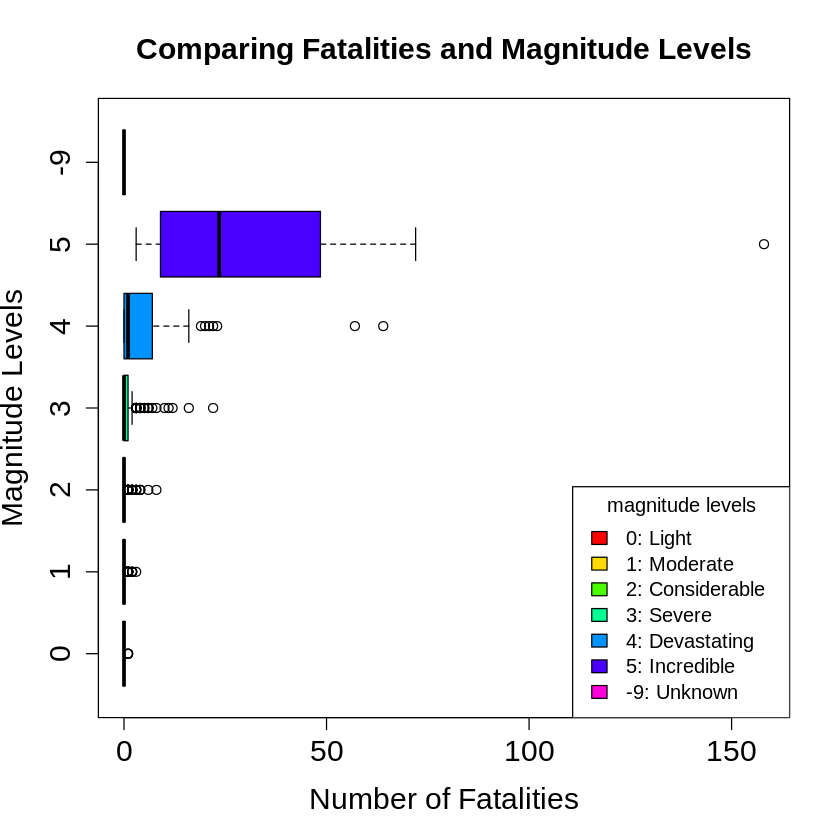

In [ ]:
# Creat 7 side-by-side boxplots to compare mag and fat

color <- rainbow(7)

boxplot(fat ~ mag, data = tornado.2008,
        main = "Comparing Fatalities and Magnitude Levels",
        xlab = "Number of Fatalities",
        ylab = "Magnitude Levels",
        horizontal = TRUE,
        names = c("0", "1", "2", "3", "4", "5", "-9"),
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5,
        col = color)

# Create a vector of name of different level of magnitude
mag.level <- c('0: Light', '1: Moderate', '2: Considerable', '3: Severe', '4: Devastating', '5: Incredible', '-9: Unknown')

# Create a reference for people to know what does each level mean
legend(x="bottomright",
       legend = mag.level,
       title = "magnitude levels",
       fill = color)

## Distribution of Categorical Variable Month (`mo`)

---


From the distribution of **month**, we can see that from 2008 to 2021, May had the most tornados (3765) and November had the least tornados (562). And like I mentioned above, we thought it would be interesting to look at the proportions of tornados of different magnitudes since it might be the case that low maginitude tornados are more likely to occur in months with more tornado occurrence. For example, May indeed have more tornados but it may be that most of them are light ones that doesn't effect people's lives that much; or that November indeed have less tornados but most of them are severe or devastating ones that effect people's lives in significant ways. Also, these 2 month also indicate different seasons: May can be spring/summer and November is mostly winter. So seaonal trends are also something interestimg to consider. Thus that is why we choose to look at May and November in **Test for a Difference in Two Proportions (Q2)**.


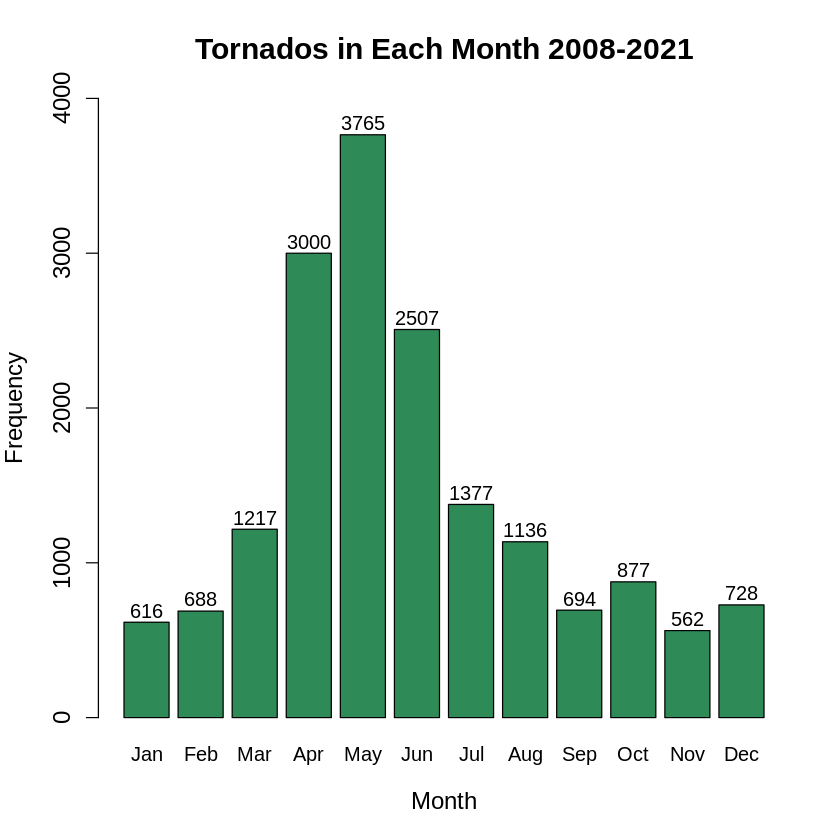

In [ ]:
# Bar chart
month.table <- table(tornado.2008$mo)

# Create a vector of month names (or use month.abb for built-in abbreviations)
month.abb <- c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

bar_midpoints.c1 <- barplot(month.table,
                         main = "Tornados in Each Month 2008-2021",
                         xlab = "Month",
                         ylab = "Frequency",
                         ylim = c(0,4000),
                         col = "seagreen",
                         names.arg = month.abb,
                         cex.lab=1.2, cex.axis=1.2, cex.main=1.5)

# Loop over the bars and add the frequency counts above each bar
for(i in 1:length(month.table)) {
  text(x = bar_midpoints.c1[i], y = month.table[i] + max(month.table)/50, labels = as.character(month.table[i]))
}

# Distribution of Tornados of Different Magnitude Levels by Month (relating to Q2)
-----
In this Comparative Plots For a Difference in Proportions, we intend to compare the proportion of magnitude level 0 tornados in each month.

As suggested by the legend, the lowest red bars indicates the proportion of magnitude level 0 tornados in each month. And as we can see, September has the "higest" red bar (highest propoetion) which is a proportion of just over 60%. As for the months we are most interested in, May and November, we can see that our speculation of low maginitude tornados are more likely to occur in months with more tornado occurrence is at least comfirmed by the data from 2008-2021: May have one of the relatively higher red bar and November have what might be one of the shortest red bar. And the 2 specific proportions fwe are interested are:

<font color="tomato">**$$p_{May} = 0.5468791501, \ p_{Nov} = 0.3825622776$$**</font>

Thus, we decided to go ahead and choose look at May and November in **Test for a Difference in Two Proportions (Q2)**.

In [ ]:
# two-way table of counts of different magnitude level in each month
mag.mon.col <- prop.table(table(tornado.2008$mag,tornado.2008$mo), 2)
mag.mon.col

    
                1            2            3            4            5
  0  0.4090909091 0.3909883721 0.4502875924 0.4326666667 0.5468791501
  1  0.4269480519 0.4142441860 0.3730484799 0.3996666667 0.2820717131
  2  0.1233766234 0.1468023256 0.1207888250 0.1076666667 0.0722443559
  3  0.0292207792 0.0348837209 0.0230073952 0.0333333333 0.0241699867
  4  0.0000000000 0.0130813953 0.0041084634 0.0083333333 0.0042496680
  5  0.0000000000 0.0000000000 0.0000000000 0.0013333333 0.0010624170
  -9 0.0113636364 0.0000000000 0.0287592440 0.0170000000 0.0693227092
    
                6            7            8            9           10
  0  0.6254487435 0.6267247640 0.6276408451 0.6383285303 0.4971493729
  1  0.2708416434 0.2752360203 0.2746478873 0.2766570605 0.3865450399
  2  0.0586358197 0.0450254176 0.0343309859 0.0533141210 0.0729760547
  3  0.0127642601 0.0094408134 0.0079225352 0.0043227666 0.0079817560
  4  0.0047865975 0.0007262164 0.0008802817 0.0000000000 0.0022805017
  5  0.000

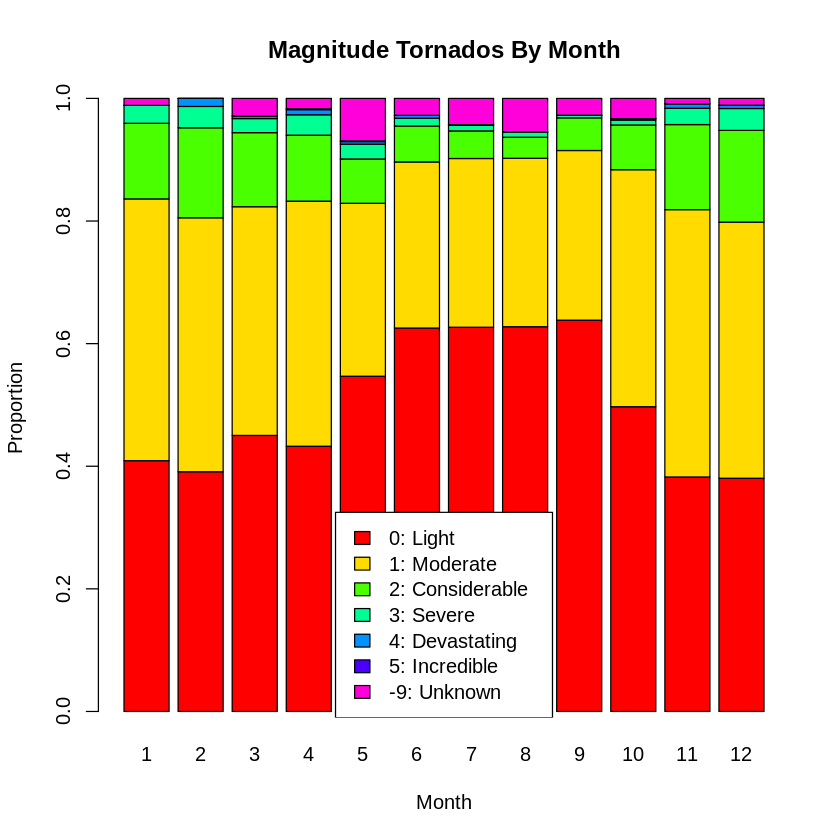

In [ ]:
standard_colors <- rainbow(7)

# create stacked bar the proportion of level 0 tornados relative the number of
# tornados occurred in that month.
barplot(mag.mon.col,
        main = "Magnitude Tornados By Month",
        xlab = "Month",
        col = standard_colors,
        ylab = "Proportion")

# add legend to plot
legend(x="bottom",
       legend=mag.level,
       fill = standard_colors)

# Test for a Difference in Two Means

------------------------------------------------------------------------

**Does magnitude level 4 (Devistating) tornados necessarily cause more fatalities than magnitude level 3 (Severe) tornados on average in the US?**

- <font color="dodgerblue">$H_0$: $\mu_{m4} - \mu_{m3} = 0$</font>
  - Magnitude level 4 (Devistating) tornados cause **the same amount of fatalities** than magnitude level 3 (Severe) tornados
- <font color="dodgerblue">**$H_0$: $\mu_{m4} - \mu_{m3} > 0$**</font>
  - Magnitude level 4 (Devistating) tornados cause **more fatalities** than magnitude level 3 (Severe) tornados?

<br>






## Permutation Test

---



In [ ]:
# Step 1: Subset the tornado.2008 data to create three different vectors

m3 <- subset(tornado.2008, select = fat, mag == "3", drop = TRUE)
m4 <- subset(tornado.2008, select = fat, mag == "4", drop = TRUE)
pooled.mean <- c(m3, m4)

In [ ]:
# Step 2: Observed test statistic

test.stat.mean <- mean(m4) - mean(m3)
test.stat.mean

[1] 4.908314

In [ ]:
n.m3 <- length(m3)
n.m4 <- length(m4)
n.pooled.mean <- length(pooled.mean)

n.m3
n.m4
n.pooled.mean

[1] 366

[1] 79

[1] 445

In [ ]:
# Step 3: Construct and save all 99,999 permutation resample statistics

set.seed(7011)
N <- 10^5 - 1
perm.stat.mean <- numeric(N)


for (i in 1:N)
{
  index <- sample(n.pooled.mean, size = n.m4, replace = FALSE)  # create index vector
  x.m4 <- pooled.mean[index]
  x.m3 <- pooled.mean[-index]
  perm.stat.mean[i] <- mean(x.m4) - mean(x.m3)  # calc difference in sample means
}

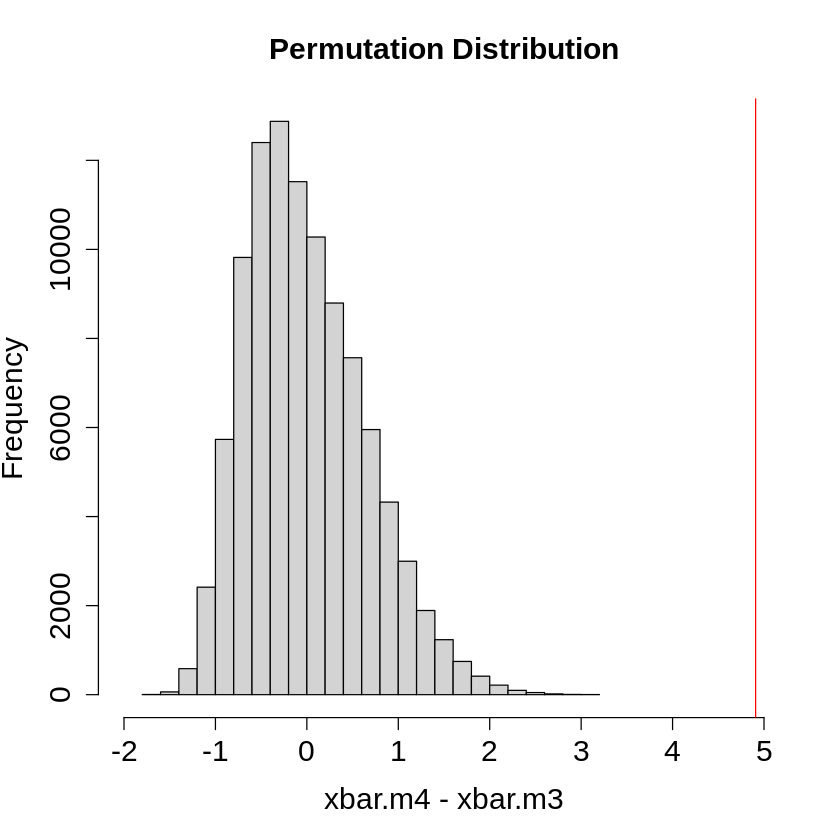

In [ ]:
# plot null distribution (permutation distribution) as a histogram

hist(perm.stat.mean, xlab = "xbar.m4 - xbar.m3",
     main = "Permutation Distribution",
     xlim = c(-2, 5),
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)

abline(v = test.stat.mean, col = "red")

In [ ]:
# Step 4: P-value (One-tail)

p.value.mean <- sum(perm.stat.mean >= test.stat.mean) + 1 / (N + 1)
format(p.value.mean, scientific = FALSE)

[1] "0.00001"

 **Make a decision using a 5% significance level:**

 <br>


The test suggest that there is a $0.001\%$ chance of getting an observed difference in the sample mean of fatalities of magnitude level 4 (Devistating) tornados and magnitude level 3 (Severe) tornados as or more extreme as the 4.90831431140624 if there really was no difference in mean of fatalities of all tornados of magnitude level 4 and fatalities of all tornados of magnitude level 3 in the US.

<br>

Since the P-value is approximately $0.00001$ which is less than or equal to the significance level $\alpha = 0.05$, the test is statistically significant.

<br>

<font color="tomato">**This means we can reject the null hypothesis and have evidence that magnitude level 4 (Devistating) tornados do cause more fatalities than magnitude level 3 (Severe) tornados on average in the US.**</font>


<br>  

## Parametric Test

---

####Method 1

In [ ]:
# Method 1

t.test(m4, m3, alt = "greater")


	Welch Two Sample t-test

data:  m4 and m3
t = 4.0678, df = 79.32, p-value = 5.56e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.900161      Inf
sample estimates:
mean of x mean of y 
5.7088608 0.8005464 


In [ ]:
format(5.56e-05, scientific = FALSE)

[1] "0.0000556"

In [ ]:
# Method 2

# Step 1: Calculate standardized test statistic
ob.diff <- mean(m4) - mean(m3)
s.m3 <- sd(m3)
s.m4 <- sd(m4)
se.mean <- sqrt(s.m3^2 / n.m3 + s.m4^2 / n.m4)  # estimate for standard error
t.test.mean <- (ob.diff - 0) / se.mean  # standardized t-test statistic

ob.diff
se.mean
t.test.mean

[1] 4.908314

[1] 1.206611

[1] 4.06785

In [ ]:
# Step 2: P-value (One-tail)

n.min.mean <- min(n.m3, n.m4)
p.value.mean2 <- 1 - pt(t.test.mean, n.min.mean - 1)

p.value.mean2
format(p.value.mean2, scientific = FALSE)

[1] 5.631403e-05

[1] "0.00005631403"

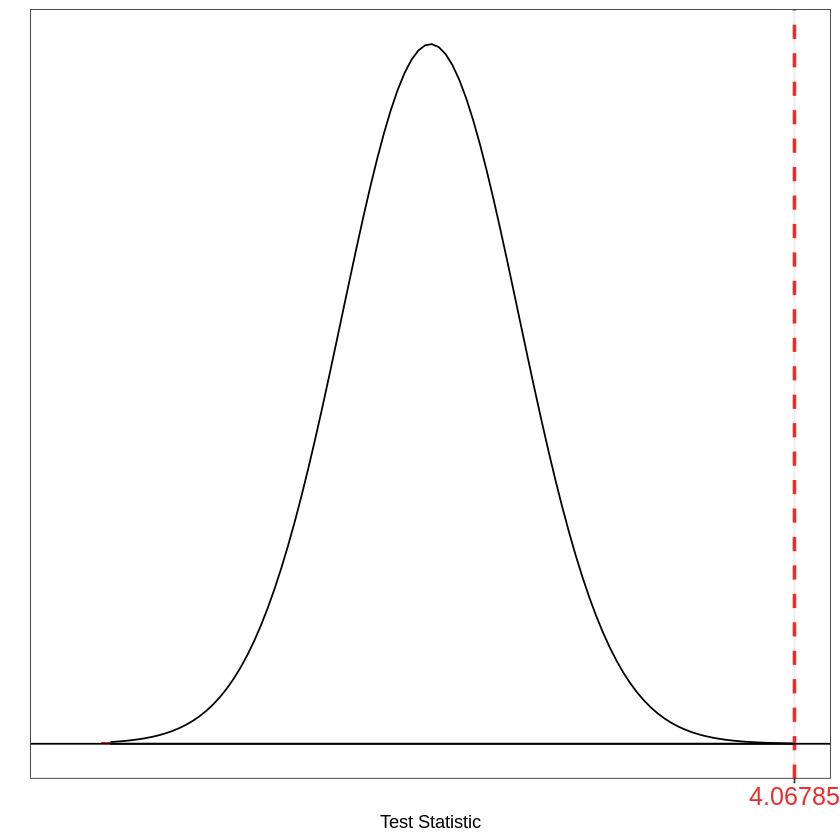

In [ ]:
#  Step 3: Graph null distribution (t-distribution) corresponding to the p-value

v <- n.min.mean - 1  # degrees of freedom
test.stat <- t.test.mean

# Calculate the range for the x-axis
end.t <- qt(0.9997, v)
xmax <- max(end.t, test.stat)
xmin <- -end.t

# Using ggplot2 to plot
library(ggplot2)


ggplot(data = data.frame(x = c(xmin, xmax)), aes(x)) +
  stat_function(fun = dt, args = list(df = v),
                geom = "area", fill = NA, color = "black") +
  stat_function(fun = dt, args = list(df = v),
                geom = "area", fill = "firebrick2", xlim = c(xmin, -test.stat)) +
  stat_function(fun = dt, args = list(df = v),
                geom = "area", fill = "firebrick2", xlim = c(test.stat, xmax)) +
  geom_vline(xintercept = test.stat, linetype = "dashed",
             color = "firebrick2", linewidth = 1) +
  labs(x = "Test Statistic", y = "") +
  scale_y_continuous(breaks = NULL) +
  scale_x_continuous(breaks = test.stat) +
  geom_hline(yintercept = 0) +
  theme_bw() +
  theme(axis.text.x = element_text(size = 15, color = "firebrick2"))

---
We have

$$\mbox{p-value} = P( T \geq 4.0678498150196)  = 5.63140309157717 \times 10^{-5} \approx 0.00005631403$$

<br>

**Make a decision using a 5% significance level:**

 <br>


The test suggest that there is a $0.005631403\%$ chance of getting an observed difference in the sample mean of fatalities of magnitude level 4 (Devistating) tornados and magnitude level 3 (Severe) tornados as or more extreme as the 4.90831431140624 if there really was no difference in mean of fatalities of all tornados of magnitude level 4 and fatalities of all tornados of magnitude level 3 in the US.

<br>

Since the P-value is approximately $0.00005631403$ which is less than or equal to the significance level $\alpha = 0.05$, the test is statistically significant.

<br>

<font color="tomato">**This means we can reject the null hypothesis and have evidence that magnitude level 4 (Devistating) tornados do cause more fatalities than magnitude level 3 (Severe) tornados on average in the US.**</font> And the results are consistent with the results drawn from using the commands.





<br>

## Comparison of Results

---




#### Assumptions
There is no assumptions we need for the permutation test. However, for Central Limit Theorem to apply for our parametric test, we need our sample size for both groups (n.m3 & n.m4) to be "large" enough ($\geq 30$). Since n.m3 $= 366 > 30$ and n.m4 $= 79 > 30$, I think CLT can definitely be applied in this case. Also, population variances $\sigma_{m3}^2$ and
$\sigma_{m4}^2$ are unknown.

<br>

#### Results & Conslusion
On a 5% significance level, both tests were statically significant and thus support the conclusion that magnitude level 4 tornadoes result in more fatalities than magnitude level 3 tornadoes on average in the U.S. The reason why they came to the same coclusion is probably because the data characteristics satistfies the CLT assumptions perfectly. Both tests effectively capture the true effect, leading to agreement in their results.

With that said, there was a relatively significant difference in the $\mbox{p-value}$ calculated from the 2 tests:

$$\mbox{p-value}_{permutation} = 0.00001$$
$$\mbox{p-value}_{parametric} \approx 0.00005631403$$

The reason behind this is likely due to the skewnwss of data. As mentioned in **Explanatory Data Analysis**, the distribution of the variable `fat`(fatalities) is highly skewed right. And while our permutation distribution captures that, our t-distriution doesn't since it is always symmetric. Especially since the $\mbox{p-value}_{permutation}\ $ can only go as samll as $0.0001 (N = 10^5)$ and it is still smaller than $\mbox{p-value}_{parametric}$, our permutation test might have more accuracy than our parametric test and respectively $\mbox{p-value}_{permutation} = 0.00001$ might be more accurate.




<br>

# Test for a Difference in Two Proportions

------------------------------------------------------------------------

**In the US, does magnitude level 0 (Light) tornados more likely to occur in May or November?**

- <font color="dodgerblue">$H_0$: $p_{May} - p_{Nov} = 0$</font>
  -  Magnitude level 0 (Light) tornados are **equally likely** to occur in May and November
- <font color="dodgerblue">$H_0$: $p_{May} - p_{Nov} \neq 0$</font>
  - The likelyhood of magnitude level 0 (Light) tornados occurring in May and November are **not the same**

  <br>




## Permutation Test

---



In [ ]:
# Step 1: Subset the tornado.2008 data to create three different vectors

may <- subset(tornado.2008, select = mag, mo == "5", drop = TRUE)
nov <- subset(tornado.2008, select = mag, mo == "11", drop = TRUE)
pooled.prop <- subset(tornado.2008, select = mag,  mo == "5" | mo == "11", drop = TRUE)

In [ ]:
# Step 2: Observed test statistic

test.stat.prop <- mean(may == '0') - mean(nov == '0')
test.stat.prop

[1] 0.1643169

In [ ]:
n.may <- length(may)
n.nov <- length(nov)
n.pooled.prop <- length(pooled.prop)

n.may
n.nov
n.pooled.prop

[1] 3765

[1] 562

[1] 4327

In [ ]:
# Step 3: Construct and save all 99,999 permutation resample statistics

set.seed(7011)
N <- 10^5 - 1
result.prop <- numeric(N)


for (i in 1:N)
{
  index <- sample(n.pooled.prop, size = n.may, replace = FALSE)  # create index vector
  result.prop[i] <- mean(pooled.prop[index] == "0") - mean(pooled.prop[-index] == "0")  # calc difference in sample proportions
}

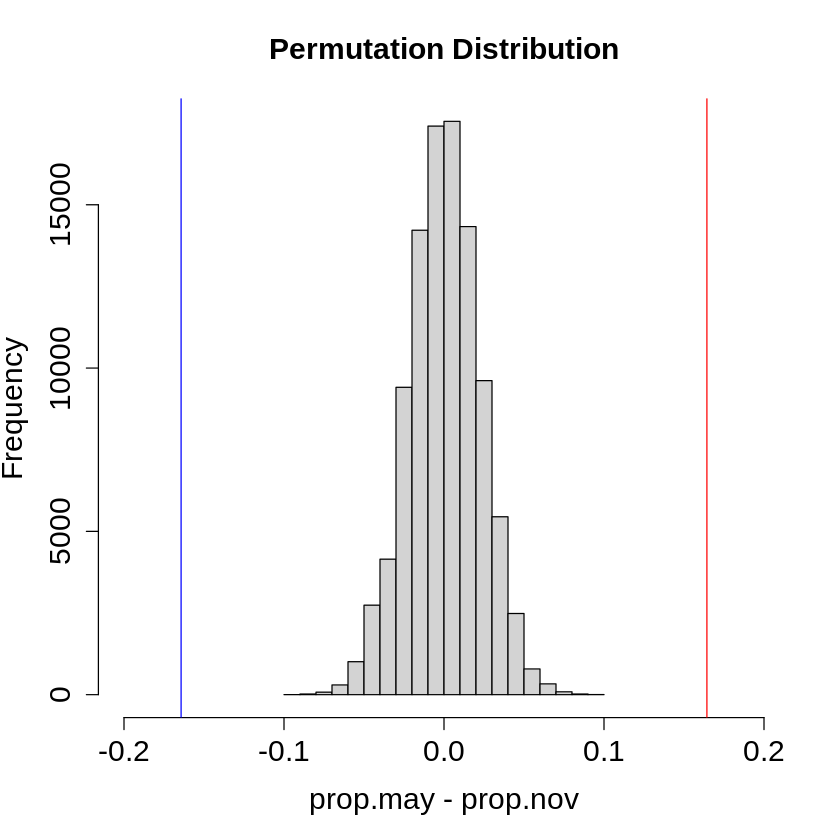

In [ ]:
# plot null distribution (permutation distribution) as a histogram

hist(result.prop, xlab = "prop.may - prop.nov",
     main = "Permutation Distribution",
     xlim = c(-0.2, 0.2),
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)

abline(v = c(-test.stat.prop, test.stat.prop), col = c("blue", "red"))

In [ ]:
# Step 4: P-value (Two-tail)

p.value.prop <- 2 * ( sum(result.prop >= test.stat.prop) +1) / (N + 1)
format(p.value.prop, scientific = FALSE)

[1] "0.00002"

 **Make a decision using a 5% significance level:**

 <br>


The test suggest that there is a $0.002\%$ chance of getting an observed difference in the sample proportion of magnitude level 0 (Light) tornados in May and sample proportion of magnitude level 0 (Light) tornados in November as or more extreme as the $\pm\ 0.16431687248633$ if there really was no difference in proportion of all magnitude level 0 (Light) tornados in May and all magnitude level 0 (Light) tornados in November in the US.

<br>

Since the P-value is approximately $0.00002$ which is less than or equal to the significance level $\alpha = 0.05$, the test is statistically significant.

<br>

<font color="tomato">**This means we can reject the null hypothesis and have evidence that magnitude level 0 (Light) tornados are indeed more likely to occur in May than November**</font>


<br>  

## Parametric Test

---

####Method 1


In [ ]:
x.may <- sum(may == "0")
x.nov <- sum(nov == "0")

# Without correction
prop.test(c(x.may, x.nov), c(n.may, n.nov), alt = "two.sided", correct = FALSE)
format(3.42e-13, scientific = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  c(x.may, x.nov) out of c(n.may, n.nov)
X-squared = 52.951, df = 1, p-value = 3.42e-13
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1211035 0.2075303
sample estimates:
   prop 1    prop 2 
0.5468792 0.3825623 


[1] "0.000000000000342"

In [ ]:
# With correction
prop.test(c(x.may, x.nov), c(n.may, n.nov), alt = "two.sided", correct = TRUE)
format(4.778e-13, scientific = FALSE)


	2-sample test for equality of proportions with continuity correction

data:  c(x.may, x.nov) out of c(n.may, n.nov)
X-squared = 52.294, df = 1, p-value = 4.778e-13
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1200810 0.2085528
sample estimates:
   prop 1    prop 2 
0.5468792 0.3825623 


[1] "0.0000000000004778"

---

####Method 2
---

##### Without Correction

In [ ]:
# Step 1: Calculate standardized test statistic
p.pooled <- (x.may + x.nov) / (n.may + n.nov)
ob.diff.prop <- mean(may == '0') - mean(nov == '0')
se.prop <- sqrt(p.pooled * (1 - p.pooled) * (1 / n.may + 1 / n.nov))  # estimate for standard error
z.test.prop <- (ob.diff.prop - 0) / se.prop  # standardized t-test statistic

ob.diff.prop
se.prop
z.test.prop

[1] 0.1643169

[1] 0.02258113

[1] 7.276735

In [ ]:
# Step 2: P-value (two-tail)

p.value.prop2 <- 2 * pnorm(-1 * z.test.prop, 0 , 1)
p.value.prop2
format(p.value.prop2, scientific = FALSE)

[1] 3.419965e-13

[1] "0.0000000000003419965"

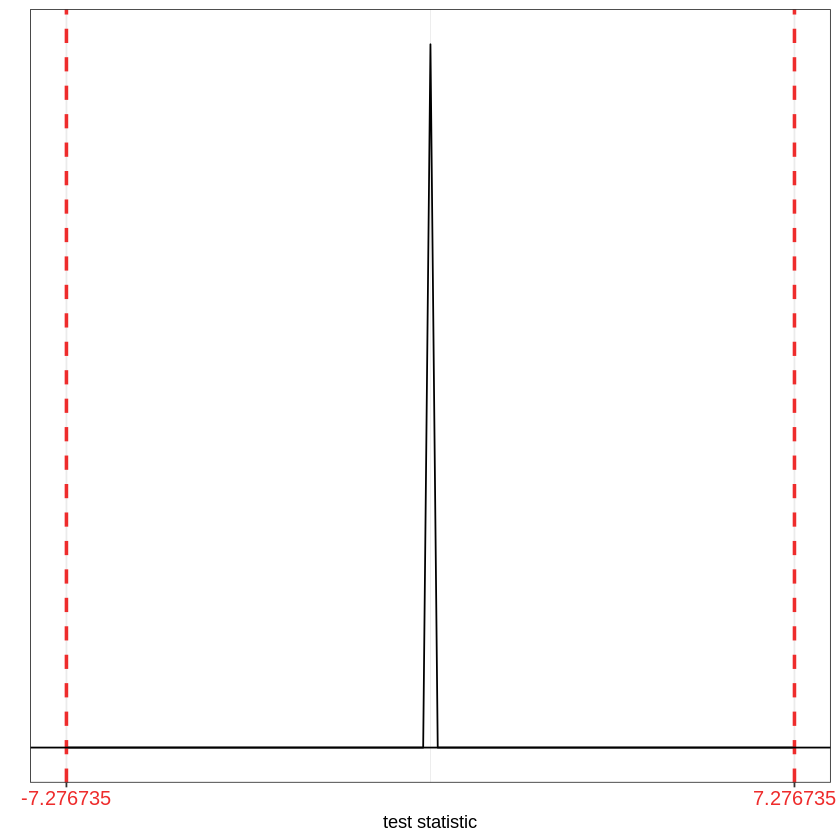

In [ ]:
#  Step 3: Graph null distribution (t-distribution) corresponding to the p-value

library(ggplot2)

test.stat <- abs(z.test.prop)
xmax <- max(0 + 4*se.prop, z.test.prop)
xmin <- -xmax


ggplot(NULL, aes(c(xmin, xmax))) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = NA,
            xlim = c(-test.stat, test.stat)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = "firebrick2",
            xlim = c(xmin, -test.stat)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = "firebrick2",
            xlim = c(test.stat, xmax)) +
  geom_vline(xintercept = c(-test.stat, test.stat), linetype="dashed",
                color = "firebrick2", linewidth = 1) +
  labs(x = "test statistic", y = "") +
  scale_y_continuous(breaks = NULL) +
  scale_x_continuous(breaks=c(-test.stat, test.stat)) +
  geom_hline(yintercept=0) +
  theme_bw() +
  theme(axis.text.x=element_text(size=12, color = "firebrick2"))

We have

$$\mbox{p-value} = 2 \times P( Z \geq 7.27673486075688)  = 3.41996470703566 \times 10^{-13} \approx 0.0000000000003419965 $$

<br>

**Make a decision using a 5% significance level:**

 <br>


The test suggest that there is a approximately $0.00000000003419965\%$ chance of getting an observed difference in the sample proportion of magnitude level 0 (Light) tornados in May and sample proportion of magnitude level 0 (Light) tornados in November as or more extreme as the $\pm\ 0.16431687248633$ if there really was no difference in proportion of all magnitude level 0 (Light) tornados in May and all magnitude level 0 (Light) tornados in November in the US.


<br>

Since the P-value is approximately $0.0000000000003419965$ which is less than or equal to the significance level $\alpha = 0.05$, the test is statistically significant.

<br>

<font color="tomato">**This means we can reject the null hypothesis and have evidence that magnitude level 0 (Light) tornados are indeed more likely to occur in May than November.**</font>

---
##### With Correction
---

In [ ]:
# Step 1: Calculate standardized test statistic
x.may.cor <- x.may - 0.5
x.nov.cor <- x.nov + 0.5

p.may.cor <- x.may.cor / n.may
p.nov.cor <- x.nov.cor / n.nov
ob.diff.prop.cor <- p.may.cor - p.nov.cor

z.test.prop.cor <- (ob.diff.prop.cor - 0) / se.prop  # standardized t-test statistic

ob.diff.prop.cor
se.prop
z.test.prop.cor

[1] 0.1632944

[1] 0.02258113

[1] 7.231454

In [ ]:
# Step 2: P-value (two-tail)

p.value.prop2.cor <- 2 * pnorm(-1 * z.test.prop.cor, 0 , 1)
p.value.prop2.cor
format(p.value.prop2.cor, scientific = FALSE)

[1] 4.778482e-13

[1] "0.0000000000004778482"

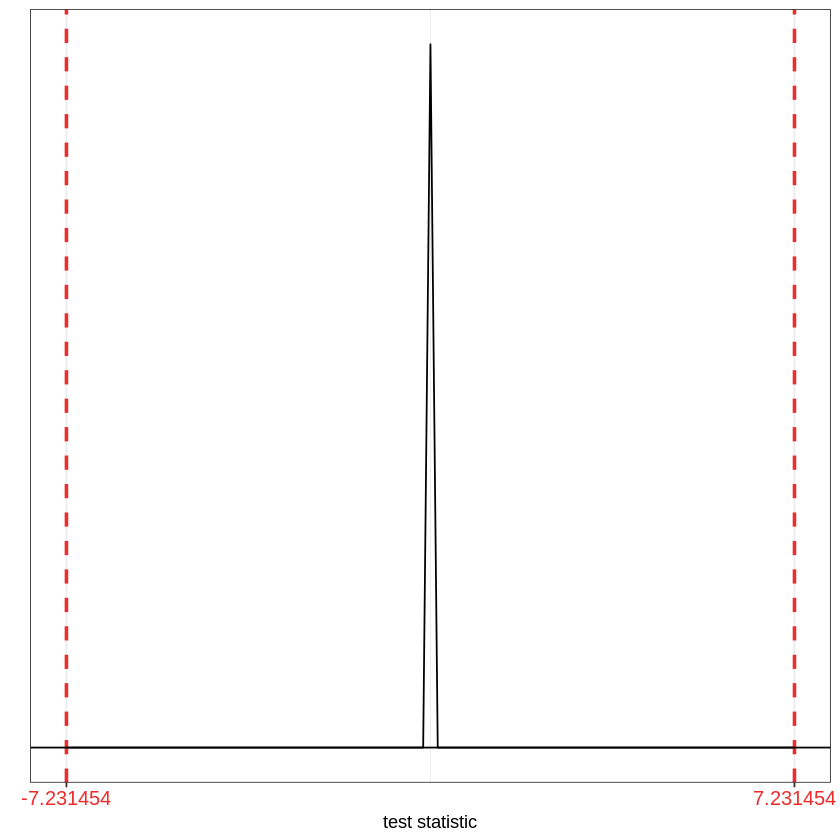

In [ ]:
#  Step 3: Graph null distribution (standard-normal-distribution) corresponding to the p-value

library(ggplot2)

test.stat <- abs(z.test.prop.cor)
xmax <- max(0 + 4*se.prop, z.test.prop.cor)
xmin <- -xmax


ggplot(NULL, aes(c(xmin, xmax))) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = NA,
            xlim = c(-test.stat, test.stat)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = "firebrick2",
            xlim = c(xmin, -test.stat)) +
  geom_area(stat = "function",   fun = dnorm,
            args = list(mean = 0, sd = se.prop),
            color = "black", fill = "firebrick2",
            xlim = c(test.stat, xmax)) +
  geom_vline(xintercept = c(-test.stat, test.stat), linetype="dashed",
                color = "firebrick2", linewidth = 1) +
  labs(x = "test statistic", y = "") +
  scale_y_continuous(breaks = NULL) +
  scale_x_continuous(breaks=c(-test.stat, test.stat)) +
  geom_hline(yintercept=0) +
  theme_bw() +
  theme(axis.text.x=element_text(size=12, color = "firebrick2"))

We have

$$\mbox{p-value} = 2 \times P( Z \geq 7.27673486075688)  = 4.77848240302163 \times 10^{-13} \approx 0.0000000000004778482 $$

<br>

**Make a decision using a 5% significance level:**

 <br>


The test suggest that there is a approximately $0.00000000004778482\%$ chance of getting an (corrected) observed difference in the sample proportion of magnitude level 0 (Light) tornados in May and sample proportion of magnitude level 0 (Light) tornados in November as or more extreme as the $\pm\ 0.16431687248633$ if there really was no difference in proportion of all magnitude level 0 (Light) tornados in May and all magnitude level 0 (Light) tornados in November in the US.


<br>

Since the P-value is approximately $0.0000000000004778482$ which is less than or equal to the significance level $\alpha = 0.05$, the test is statistically significant.

<br>

<font color="tomato">**This means we can reject the null hypothesis and have evidence that magnitude level 0 (Light) tornados are indeed more likely to occur in May than November.**</font> This results are consistent with the results without correction. The results of performing the tests manually are also consistent with the results drawn from using the commands.

## Comparison of Results

---




#### Assumptions
There is no assumptions we need for the permutation test. However, for Central Limit Theorem to apply for our parametric test, $\mbox{n.may}\hat{p}_{may} \geq 10$, $\mbox{n.may}(1-\hat{p}_{may}) \geq 10$, $\mbox{n.nov}\hat{p}_{nov} \geq 10$, and $\mbox{n.nov}(1-\hat{p}_{nov}) \geq 10$ are satisfied. Since

$$\mbox{n.may}\hat{p}_{may} = 2059 >  10$$
$$\mbox{n.may}(1-\hat{p}_{may}) = 1706 > 10$$
$$\mbox{n.nov}\hat{p}_{nov} = 215 > 10$$
$$\mbox{n.nov}(1-\hat{p}_{nov}) = 347 > 10$$

CLT certainly applies in this case.

To note that since these assumptions apply, our permutation distribution should likely to appear to be approximately normal as well.



<br>

#### Results & Conslusion
On a 5% significance level, both tests were statically significant and thus support the conclusion that magnitude level 0 (Light) tornados are indeed more likely to occur in May than November on average in the U.S. On a 5% significance level, both tests were statically significant and thus support the conclusion that magnitude level 4 tornadoes result in more fatalities than magnitude level 3 tornadoes on average in the U.S. The reason why they came to the same coclusion is probably because the data characteristics satistfies the CLT assumptions perfectly. Both tests effectively capture the true effect, leading to agreement in their results.

With that said, there was a relatively really significant difference in the $\mbox{p-value}$ from the 2 tests:

$$\mbox{p-value}_{permutation} = 0.00002$$
$$\mbox{(with correction) p-value}_{parametric} = 4.77848240302163 \times 10^{-13}$$

The reason behind this is likely due to the the construction and calclation of the the $\mbox{p-value}_{permutation}\ $. In our permutation test, we did the resample only $N = 10^5$ times, which means that for a two-tail test, the $\mbox{p-value}_{permutation}\ $ can only go as small as $2 \times \dfrac{1}{10^5}$ which is $0.00002$. Since the null distribution for both test is pproximatelt normal and $\mbox{p-value}_{parametric}$ is way smaller, our parametric test might have more accuracy than our permutation test and respectively $\mbox{(with correction) p-value}_{parametric} = 4.77848240302163 \times 10^{-13}$ might be more accurate in this case.


<br>

In [ ]:
n.may * mean(may == '0')
n.may * (1 - mean(may == '0'))
n.nov * mean(nov == '0')
n.nov * (1 - mean(nov == '0'))

[1] 2059

[1] 1706

[1] 215

[1] 347

# Conclusion

---


Our analysis of tornado data spanning from 1950 to 2021 has provided significant insights into the seasonality and severity of tornado occurrences across the United States. Through rigorous statistical testing, we established that higher magnitude tornadoes, specifically those of magnitude level 4, indeed result in a higher number of fatalities compared to magnitude level 3 tornadoes. Additionally, our findings confirm a variation in tornado occurrences, with light tornadoes (magnitude level 0) more likely to occur in May than in November.

<br>

###Implications for Climate Policy and Emergency Management


These results have potential implications for climate policy and emergency management strategies. The clear link between tornado magnitude and fatalities underscores the need for targeted disaster preparedness and response strategies in regions prone to higher magnitude tornadoes. As climate change continues to affect weather patterns, it is likely that the frequency and intensity of such extreme weather events could increase. Therefore, strengthening building codes, improving early warning systems, and community education become imperative to mitigate the impacts of these disasters.

Furthermore, the periodical patterns observed in tornado occurrences suggest that resource allocation for emergency response can be more effectively planned according to predictable seasonal trends. This could enhance the efficiency of emergency operations, ensuring that resources are pre-positioned optimally before peak tornado seasons.

<br>

###Future Research Directions

While our study provides a foundational understanding, further research is essential to deepen insights and refine predictions under changing climatic conditions. Future studies could explore:
1. Can we generalize our the trends on May and November into seasonal trends with more climatology researh and analysis?
2. Longitudinal trends in tornado magnitude and frequency - Investigating whether climate change is influencing the intensity and frequency of tornadoes
3. Impact of geographical factors on tornado outcomes - Include geographical features to model the path, magnitude, and impact of tornadoes.
4. Are fatalities linked to any other geographical or characteristics of the tornado, such as length of track and width?

<br>

Overall, advancements in technology and data analytics offer new opportunities for enhancing tornado research and response strategies. Utilizing big data analytics, machine learning models, and simulation software could significantly improve the accuracy of tornado forecasting and risk assessment.
In conclusion, while our study sheds light on critical aspects of tornado patterns and their impacts, the dynamic nature of climate patterns calls for a sustained focus on enhancing our understanding and response strategies towards tornadoes. Integrative approaches that encompass advanced data analysis techniques and cross-disciplinary collaboration will be crucial in addressing the challenges posed by these natural disasters in the era of climate change.

# Feedback and Rubric:

---

| Topic | Possible | Deduction |
|-------|----------|--------|
| Setting up Hypotheses | 2| |
| Exploratory Data Analysis |  4 | |
| Hypothesis Test for Difference in Means  | 6 |  |
| Hypothesis Test for Difference in Proportions  | 6 |  |
| Organization and overal quality  |  2 |  |

<br>

## Total Earned:  / 20
